In [1]:
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("DropHeadersExample").getOrCreate()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

24/06/04 10:02:29 WARN Utils: Your hostname, Ronits-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.2 instead (on interface en0)
24/06/04 10:02:29 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/04 10:02:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [32]:
def clean_data(df):
    df = df.drop(columns=['Unnamed: 0'])
    df = df.fillna({'Unnamed: 3': ""})
    df = df.dropna(subset=['Inferential statistics. Confidence intervals'])
    df = df.dropna(subset=['Unnamed: 2'])
    return df

df = pd.read_excel(r'/Users/ronitguptaaa/Downloads/The Data Science Course 2021 - All Resources/Part_3_Statistics/S19_L119/3.17.Practical-example.Confidence-intervals-exercise.xlsx')

df_clean = clean_data(df.copy())
df_clean = df_clean.to_numpy()

df = pd.DataFrame(df_clean)

In [36]:
df = pd.read_csv('Shoes_Dataset')
def clean_data(df):
    df = df.drop(columns=['Unnamed: 1'])
    df = df.drop(columns=['2'])
    df = df.rename(columns={'Unnamed: 13': 'Year'})
    return df

df_clean = clean_data(df.copy())
df_clean.to_parquet('Al-Bundy-Final-Dataset')

Analysis

In [39]:
df = pd.read_parquet('/Users/ronitguptaaa/Documents/Excel Analysis/Shoes Dataset - AlBundy/Al-Bundy-Final-Dataset')
display(df)

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice
0,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014.0,1,159.0
1,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014.0,1,159.2
2,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014.0,1,119.2
3,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014.0,1,159.0
4,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014.0,1,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31 13:35:12,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016.0,12,139.0
14963,65774,2016-12-31 14:32:48,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016.0,12,149.0
14964,65775,2016-12-31 15:59:12,Canada,2203,CAN6,Male,10.5,43-44,10.0,179,0.3,2016.0,12,125.3
14965,65776,2016-12-31 17:54:24,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016.0,12,199.0


/var/folders/ys/dxxwlhx16v3dl402b1gm7hrh0000gn/T/ipykernel_33646/2978445143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=['blue', 'pink'])


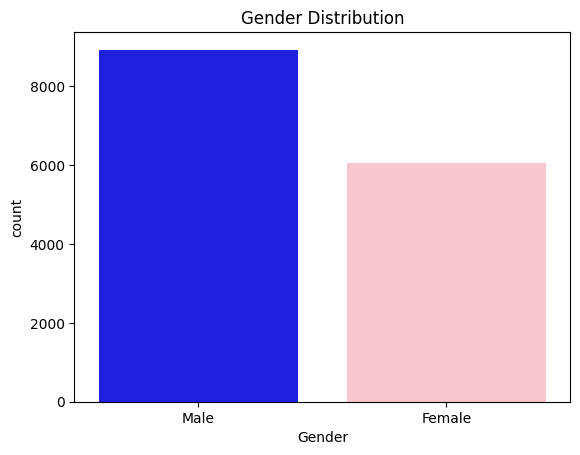

In [44]:
sns.countplot(data=df, x='Gender', palette=['blue', 'pink'])
plt.title('Gender Distribution')
plt.show()

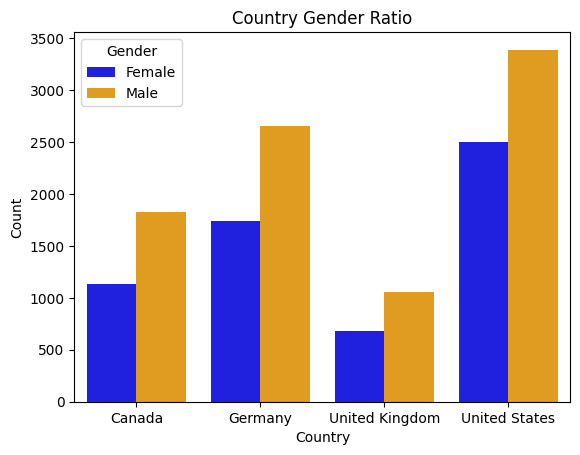

In [15]:
gender_counts = df.groupby(['Country', 'Gender']).size().reset_index(name='Count')

sns.barplot(data=gender_counts, x='Country', y='Count', hue='Gender', palette=['blue', 'orange'])
plt.title('Country Gender Ratio')
plt.show()

In [23]:
df = spark.sql(
    """SELECT ROUND(SUM(SalePrice),2) AS TotalSalesPrice, ROUND(SUM(UnitPrice), 2) AS TotalUnitPrice, Gender 
        FROM PARQUET.`/Users/ronitguptaaa/Documents/Excel Analysis/Shoes Dataset - AlBundy/Al-Bundy-Final-Dataset`
        GROUP BY Gender    
    """
)

pdf = df.toPandas()
pdf_melted = pd.melt(pdf, id_vars='Gender', value_vars=['TotalSalesPrice', 'TotalUnitPrice'], 
                     var_name='Metric', value_name='Value')

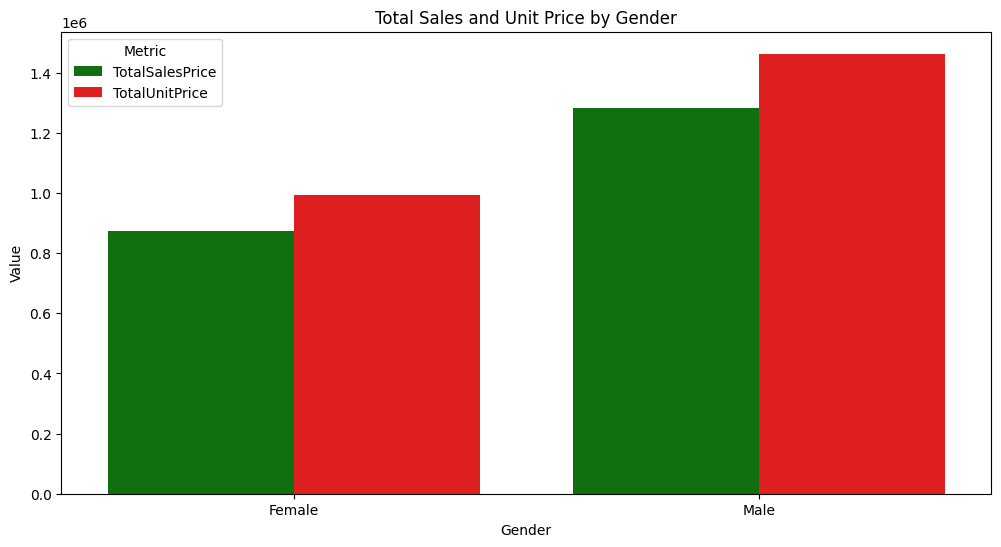

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=pdf_melted, x='Gender', y='Value', hue='Metric', palette=['green', 'red'])
plt.title('Total Sales and Unit Price by Gender')
plt.ylabel('Value')
plt.xlabel('Gender')
plt.show()

In [26]:
df = spark.sql(
    """SELECT ROUND(SUM(SalePrice),2) AS TotalSalesPrice, ROUND(SUM(UnitPrice), 2) AS TotalUnitPrice, Country 
        FROM PARQUET.`/Users/ronitguptaaa/Documents/Excel Analysis/Shoes Dataset - AlBundy/Al-Bundy-Final-Dataset`
        GROUP BY Country    
    """
)

pdf = df.toPandas()
pdf_melted = pd.melt(pdf, id_vars='Country', value_vars=['TotalSalesPrice', 'TotalUnitPrice'], 
                     var_name='Metric', value_name='Value')

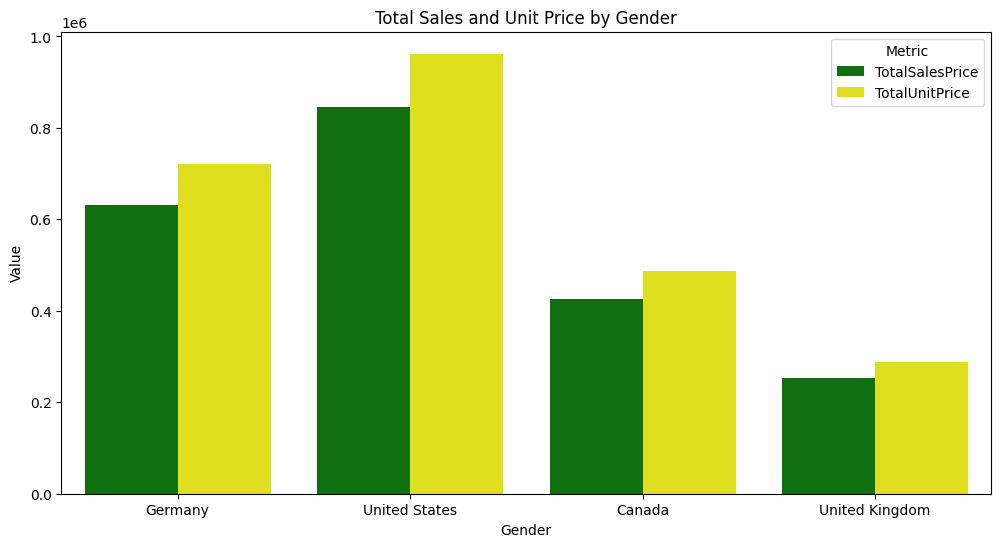

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=pdf_melted, x='Country', y='Value', hue='Metric', palette=['green', 'yellow'])
plt.title('Total Sales and Unit Price by Gender')
plt.ylabel('Value')
plt.xlabel('Gender')
plt.show()

/var/folders/ys/dxxwlhx16v3dl402b1gm7hrh0000gn/T/ipykernel_33646/3228082453.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=pdf, x='Shop', y='TotalDiscounts', marker='o', palette=['red'])


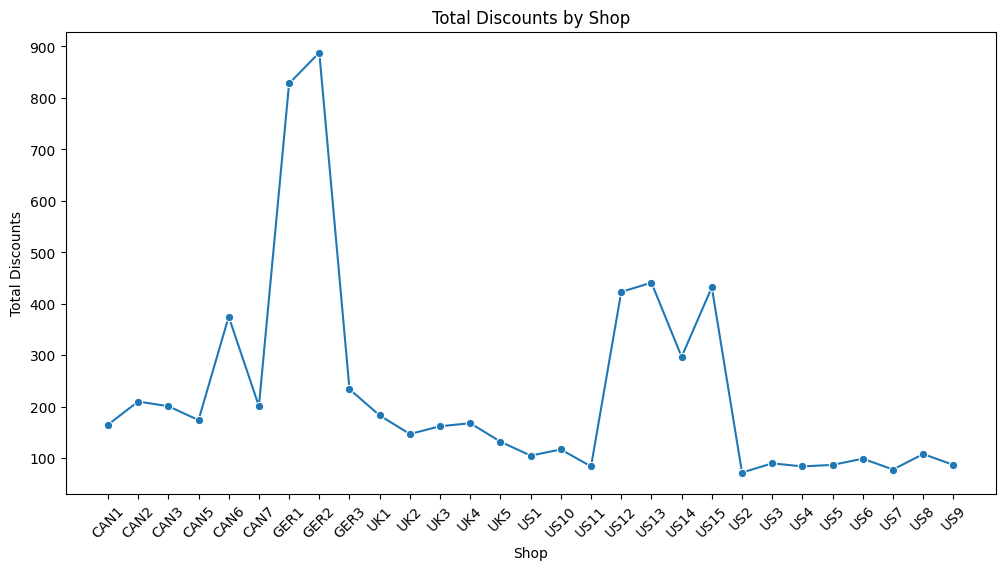

In [54]:
df = spark.sql(
    """SELECT 
        COUNT(CASE WHEN Discount > 0 THEN 1 END) AS TotalDiscounts, Shop 
        FROM PARQUET.`/Users/ronitguptaaa/Documents/Excel Analysis/Shoes Dataset - AlBundy/Al-Bundy-Final-Dataset`
        GROUP BY Shop
    """
)

plt.figure(figsize=(12, 6))
sns.lineplot(data=pdf, x='Shop', y='TotalDiscounts', marker='o', palette=['red'])

plt.title('Total Discounts by Shop')
plt.ylabel('Total Discounts')
plt.xlabel('Shop')
plt.xticks(rotation=45)
plt.show()

In [66]:
df = spark.sql(
    """SELECT Shop, ROUND(SUM(SalePrice),2) AS TotalSalesPerShop 
        FROM PARQUET.`/Users/ronitguptaaa/Documents/Excel Analysis/Shoes Dataset - AlBundy/Al-Bundy-Final-Dataset`
        GROUP BY Shop
    """
)
pdf = df.toPandas()
mean_sales = pdf['TotalSalesPerShop'].mean()

/var/folders/ys/dxxwlhx16v3dl402b1gm7hrh0000gn/T/ipykernel_33646/3535273707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf, x='Shop', y='TotalSalesPerShop',  palette=['Green', 'Orange'])
/var/folders/ys/dxxwlhx16v3dl402b1gm7hrh0000gn/T/ipykernel_33646/3535273707.py:2: UserWarning: 
The palette list has fewer values (2) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=pdf, x='Shop', y='TotalSalesPerShop',  palette=['Green', 'Orange'])


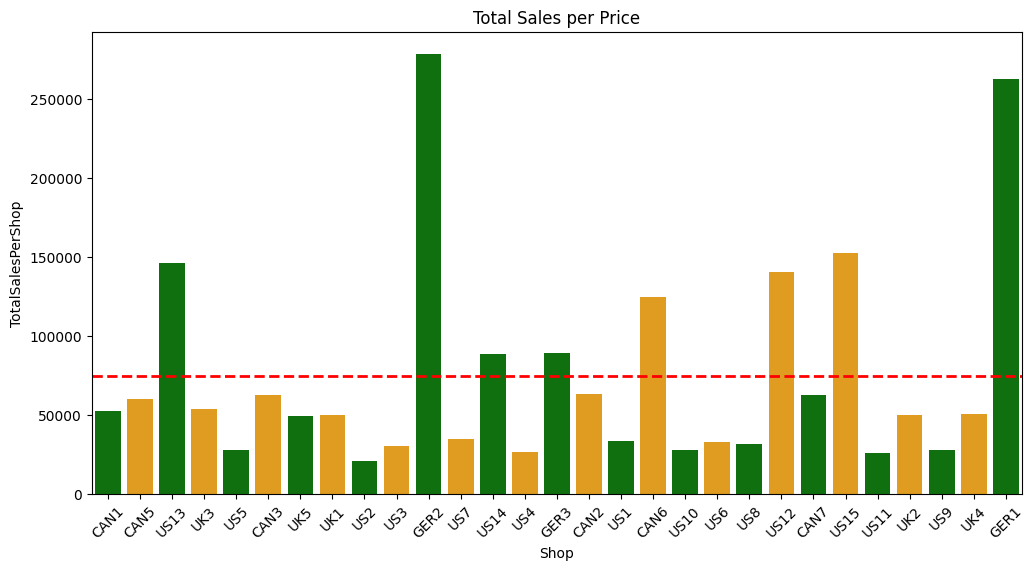

In [67]:
plt.figure(figsize=(12,6))
sns.barplot(data=pdf, x='Shop', y='TotalSalesPerShop',  palette=['Green', 'Orange'])
plt.title('Total Sales per Shop')
plt.xticks(rotation=45)
plt.axhline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_sales:.2f}')
plt.show()

In [79]:
df = spark.sql(
    """SELECT ROUND(ROUND(SUM(SalePrice),2)/ROUND(COUNT(SalePrice), 2),2) AS AverageSalePrice,
    ROUND(ROUND(SUM(UnitPrice),2)/ROUND(COUNT(UnitPrice), 2),2) AS AverageUnitPrice,
    Shop
        FROM PARQUET.`/Users/ronitguptaaa/Documents/Excel Analysis/Shoes Dataset - AlBundy/Al-Bundy-Final-Dataset`
        GROUP BY Shop
    """
)
pdf = df.toPandas()
pdf_melted = pd.melt(pdf, id_vars='Shop', value_vars=['AverageSalePrice', 'AverageUnitPrice'], 
                     var_name='Metric', value_name='Value')

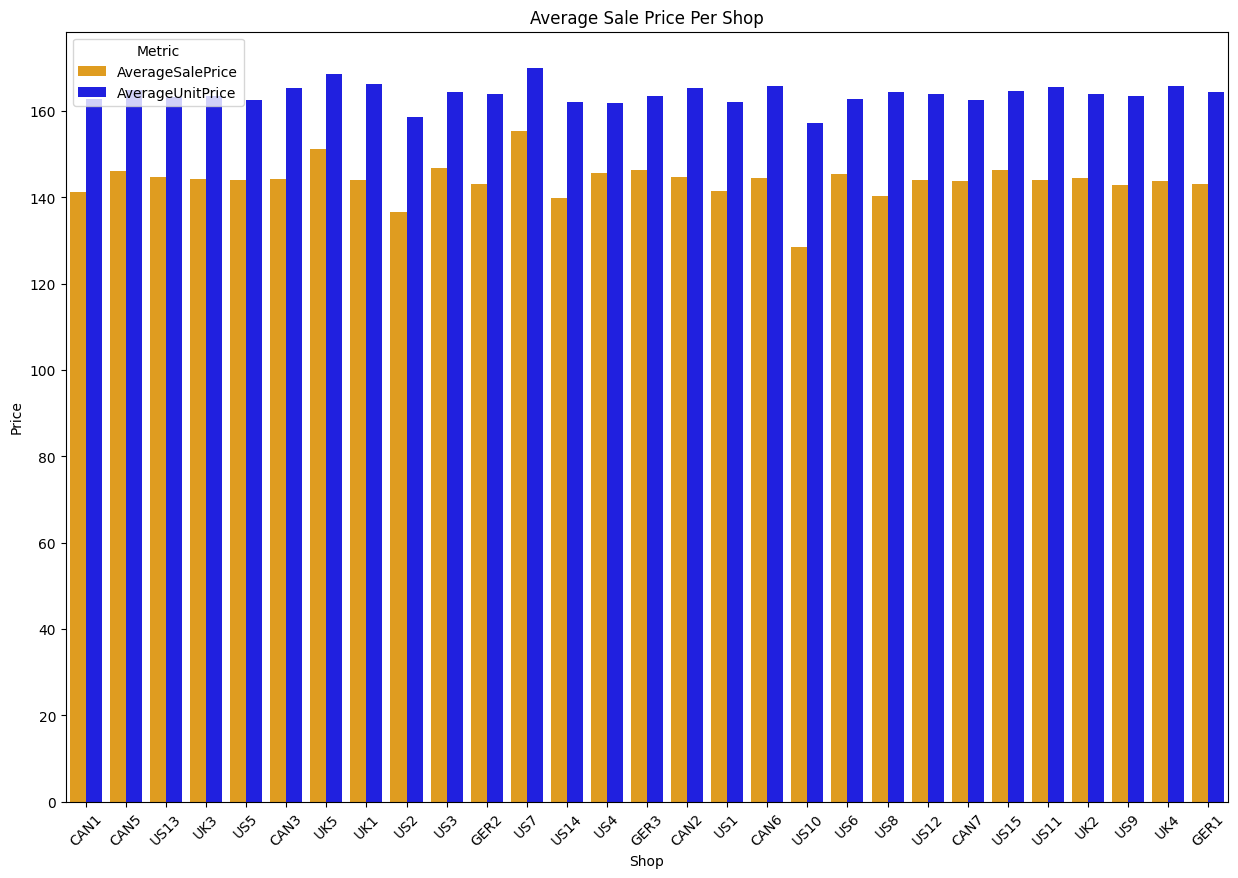

In [84]:
plt.figure(figsize=(15,10))
sns.barplot(data=pdf_melted, x='Shop', y='Value',hue='Metric', palette=['Orange', 'Blue'])
plt.title('Average Sale Price Per Shop')
plt.xlabel('Shop')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()